In [ ]:
 import torch
 import torch.nn as nn
 import torch.optim as optim
 from torchvision import datasets, transforms
 from torch.utils.data import DataLoader
 import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
 ])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 38.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.41MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.21MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class SingleLayerEncoder(nn.Module):
  def __init__(self, input_dim, latent_dim):
    super(SingleLayerEncoder, self).__init__()
    self.fc = nn.Linear(input_dim, latent_dim)  # Single fully connected layer
  def forward(self, x):
    return torch.relu(self.fc(x))  # Use ReLU activatio

In [ ]:
class SingleLayerDecoder(nn.Module):
  def __init__(self, latent_dim, output_dim):
    super(SingleLayerDecoder, self).__init__()
    self.fc = nn.Linear(latent_dim, output_dim)  # Single fully connected layer
  def forward(self, x):
    return torch.sigmoid(self.fc(x))  # Use Sigmoid to output values in [0, 1

In [ ]:
def __init__(self, encoder, decoder):
  super(SingleLayerAutoencoder, self).__init__()
  self.encoder = encoder
  self.decoder = decoder
def forward(self, x):
  latent = self.encoder(x)
  reconstructed = self.decoder(latent)
  return reconstructed

In [ ]:
import torch
import torch.nn as nn

class SingleLayerEncoder(nn.Module):
  def __init__(self, input_dim, latent_dim):
    super(SingleLayerEncoder, self).__init__()
    self.fc = nn.Linear(input_dim, latent_dim)  # Single fully connected layer
  def forward(self, x):
    return torch.relu(self.fc(x))  # Use ReLU activation

class SingleLayerDecoder(nn.Module):
  def __init__(self, latent_dim, output_dim):
    super(SingleLayerDecoder, self).__init__()
    self.fc = nn.Linear(latent_dim, output_dim)  # Single fully connected layer
  def forward(self, x):
    return torch.sigmoid(self.fc(x))  # Use Sigmoid to output values in [0, 1]

# Define the SingleLayerAutoencoder class
class SingleLayerAutoencoder(nn.Module):
  def __init__(self, encoder, decoder):
    super(SingleLayerAutoencoder, self).__init__()
    self.encoder = encoder
    self.decoder = decoder
  def forward(self, x):
    latent = self.encoder(x)
    reconstructed = self.decoder(latent)
    return reconstructed

input_dim = 28 * 28  # MNIST images are 28x28
latent_dim = 64      # Dimensionality of the latent space

encoder = SingleLayerEncoder(input_dim, latent_dim)
decoder = SingleLayerDecoder(latent_dim, input_dim)
model = SingleLayerAutoencoder(encoder, decoder).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error for reconstructio

In [ ]:
def train(model, dataloader, optimizer, criterion, device):
  model.train()
  epoch_loss = 0
  for batch in dataloader:
      images, _ = batch
      images = images.view(images.size(0), -1).to(device)  # Flatten images
      optimizer.zero_grad()
      reconstructed = model(images)
      loss = criterion(reconstructed, images)
      loss.backward()
      optimizer.step()
      epoch_loss += loss.item()
  return epoch_loss / len(dataloader)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
epochs = 5
for epoch in range(epochs):
  train_loss = train(model, train_loader, optimizer, criterion, device)
  print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}')

Epoch 1/5, Loss: 0.9243
Epoch 2/5, Loss: 0.8845
Epoch 3/5, Loss: 0.8764
Epoch 4/5, Loss: 0.8737
Epoch 5/5, Loss: 0.8725


In [ ]:
def evaluate(model, dataloader, device):
  model.eval()
  reconstructed_images = []
  original_images = []
  with torch.no_grad():
    for batch in dataloader:
      images, _ = batch
      images = images.view(images.size(0), -1).to(device)
      outputs = model(images)
      reconstructed_images.append(outputs.cpu())
      original_images.append(images.cpu())
  return torch.cat(original_images), torch.cat(reconstructed_images)

In [ ]:
original, reconstructed = evaluate(model, test_loader, device)


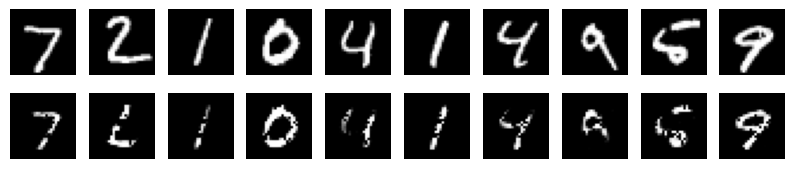

In [ ]:
def plot_images(original, reconstructed, n=10):
  plt.figure(figsize=(10, 2))
  for i in range(n):
        # Original images
      plt.subplot(2, n, i + 1)
      plt.imshow(original[i].view(28, 28), cmap='gray')
      plt.axis('off')
        # Reconstructed images
      plt.subplot(2, n, i + 1 + n)
      plt.imshow(reconstructed[i].view(28, 28), cmap='gray')
      plt.axis('off')
  plt.show()
plot_images(original, reconstructed)